# Análise exploratória de dados
**Descrição:**

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn as sk 

# variaveis globais
binary_colors = ['#2a08c2', '#d606d0']  # Cores para variáveis binárias


In [2]:
doc = "Obesity.csv"
df = pd.read_csv(doc)
df.head(2)

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight


In [3]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'Obesity'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [14]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_cols].describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [21]:
# Transformando as colunas do dataframe com auxilio do dicionário
# Dicionário de renomeação (De: Sigla Original -> Para: Nome Descritivo)
novas_colunas = {
    'Gender': 'Genero',
    'Age': 'Idade',
    'Height': 'Altura',
    'Weight': 'Peso',
    'family_history': 'Historico_Familiar',
    'FAVC': 'Consumo_Alta_Caloria',       # Frequent consumption of high-caloric food
    'FCVC': 'Freq_Vegetais',              # Frequency of consumption of vegetables
    'NCP':  'Num_Refeicoes',              # Number of main meals
    'CAEC': 'Comer_Entre_Refeicoes',      # Consumption of food between meals
    'SMOKE': 'Fumante',
    'CH2O': 'Consumo_Agua',               # Daily water consumption
    'SCC':  'Monitora_Calorias',          # Calories consumption monitoring
    'FAF':  'Freq_Ativ_Fisica',           # Physical activity frequency
    'TUE':  'Tempo_Dispositivos',         # Time using electronic devices
    'CALC': 'Consumo_Alcool',
    'MTRANS': 'Transporte',
    'Obesity': 'Nivel_Obesidade'
}

# Renomeando as colunas
df.rename(columns=novas_colunas, inplace=True)
df.head(2)

,Genero,Idade,Altura,Peso,Historico_Familiar,Consumo_Alta_Caloria,Freq_Vegetais,Num_Refeicoes,Comer_Entre_Refeicoes,Fumante,Consumo_Agua,Monitora_Calorias,Freq_Ativ_Fisica,Tempo_Dispositivos,Consumo_Alcool,Transporte,Nivel_Obesidade
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight


In [23]:
# Traduzindo os valores da coluna Nivel_Obesidade e Genero

# Dicionários de tradução
traducao_obesidade = {
    'Insufficient_Weight': 'Abaixo do Peso',
    'Normal_Weight': 'Peso Normal',
    'Overweight_Level_I': 'Sobrepeso Grau I',
    'Overweight_Level_II': 'Sobrepeso Grau II',
    'Obesity_Type_I': 'Obesidade Grau I',
    'Obesity_Type_II': 'Obesidade Grau II',
    'Obesity_Type_III': 'Obesidade Grau III'
}

traducao_genero = {
    'Male': 'Masculino',
    'Female': 'Feminino'
}

# Aplicando a substituição
df['Nivel_Obesidade'] = df['Nivel_Obesidade'].replace(traducao_obesidade)
df['Genero'] = df['Genero'].replace(traducao_genero)


### 📌 Análise: Gênero x Obesidade

Há uma distinção clara nas categorias severas: a Obesidade Grau II é predominantemente masculina, enquanto a Obesidade Grau III é massivamente feminina. 
Nas demais categorias, há um equilíbrio maior. Isso torna o gênero uma variável preditora essencial, pois inverte a probabilidade de risco entre os graus mais altos da doença.

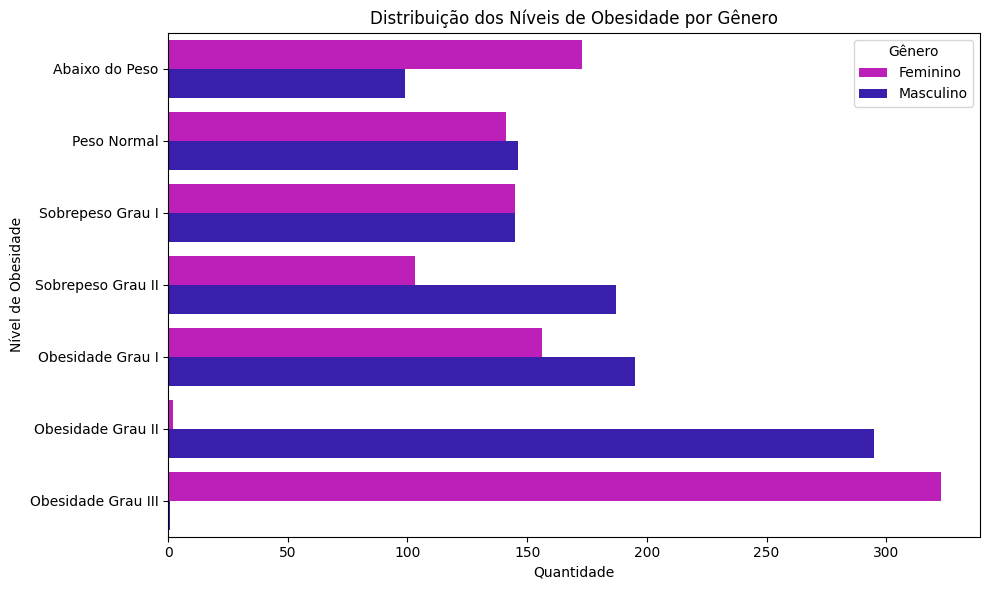

In [37]:
# Definir ordem lógica das categorias
ordem_obesidade = [
   'Abaixo do Peso', 'Peso Normal',
    'Sobrepeso Grau I', 'Sobrepeso Grau II',
    'Obesidade Grau I', 'Obesidade Grau II', 'Obesidade Grau III'
]
9
# Gráfico
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Nivel_Obesidade', hue='Genero', palette=binary_colors, order=ordem_obesidade)
plt.title('Distribuição dos Níveis de Obesidade por Gênero')
plt.xlabel('Quantidade')
plt.ylabel('Nível de Obesidade')
plt.legend(title='Gênero')
plt.tight_layout()
plt.savefig('obesidade_por_genero.png')

### 📌 Análise: Histórico Familiar

Os dados revelam uma correlação alarmante: a quase totalidade dos pacientes com Obesidade Grau II e III possui histórico familiar de excesso de peso. Isso sugere que o ambiente familiar e a genética são fatores determinantes para o agravamento do quadro. Para a estratégia de negócio, isso indica que intervenções focadas na família (e não apenas no indivíduo isolado) são essenciais para prevenir casos severos.

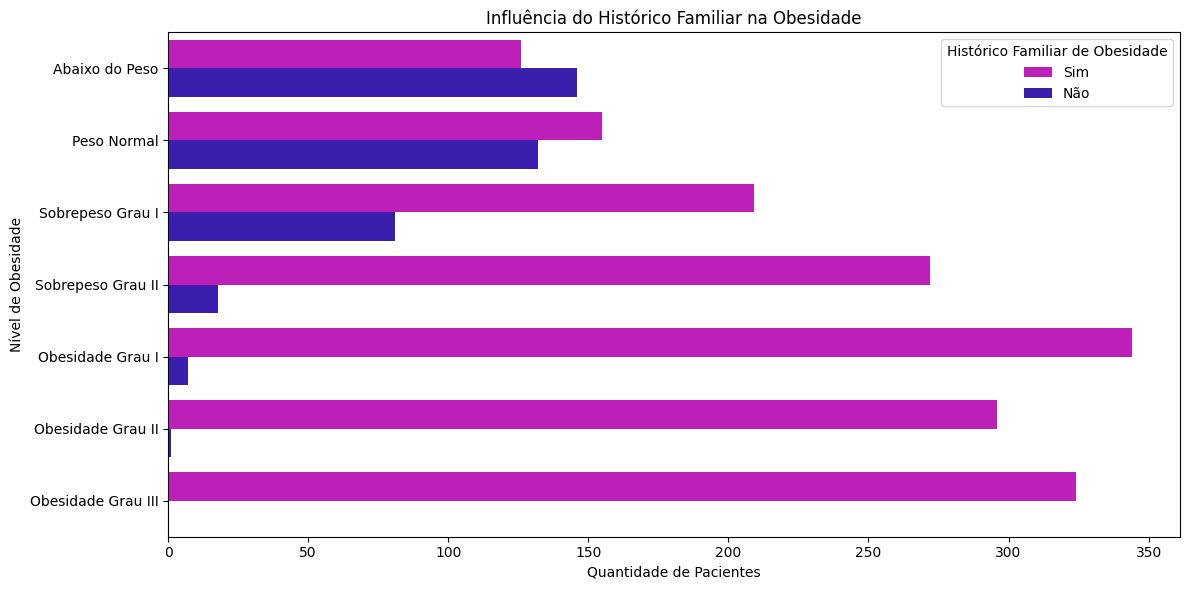

In [38]:
# Traduzindo Historico Familiar para o teste
traducao_familia = {'yes': 'Sim', 'no': 'Não'}
df['Historico_Familiar'] = df['Historico_Familiar'].replace(traducao_familia)

# Plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Nivel_Obesidade', hue='Historico_Familiar', order=ordem_obesidade, palette=binary_colors)
plt.title('Influência do Histórico Familiar na Obesidade')
plt.xlabel('Quantidade de Pacientes')
plt.ylabel('Nível de Obesidade')
plt.legend(title='Histórico Familiar de Obesidade')
plt.tight_layout()
plt.savefig('historico_familiar_obesidade.png')

### 📌 Análise de Idade x Obesidade

Ao analisar a distribuição etária entre as diferentes categorias de peso, observamos os seguintes padrões:

**Concentração em Jovens Adultos:** A maior parte da base de dados, independentemente da categoria de peso, está concentrada na faixa dos 20 aos 30 anos. Isso indica que o problema de obesidade severa neste dataset não é exclusivo de pessoas mais velhas.

**Obesidade Grau II e III (Jovens):** É notável que as medianas (linha central da caixa) dos grupos Obesidade Grau II e Grau III estão situadas em idades muito jovens (aprox. 23-26 anos). Isso refuta a hipótese de que a obesidade severa só se desenvolve com o avanço da idade.

**Outliers em "Peso Normal":** A categoria Peso Normal apresenta diversos outliers na parte superior (acima de 40/50 anos). Isso sugere que, embora a maioria dos jovens tenha peso normal, existem indivíduos mais velhos saudáveis, mas eles fogem do padrão geral da amostra (que é majoritariamente jovem).

**Conclusão para o Modelo:** A idade sozinha pode não ser um separador linear forte (ex: "quanto mais velho, mais obeso"), pois temos muitos jovens com obesidade grave. O modelo precisará combinar Idade com outras variáveis (como hábitos) para ser preciso.

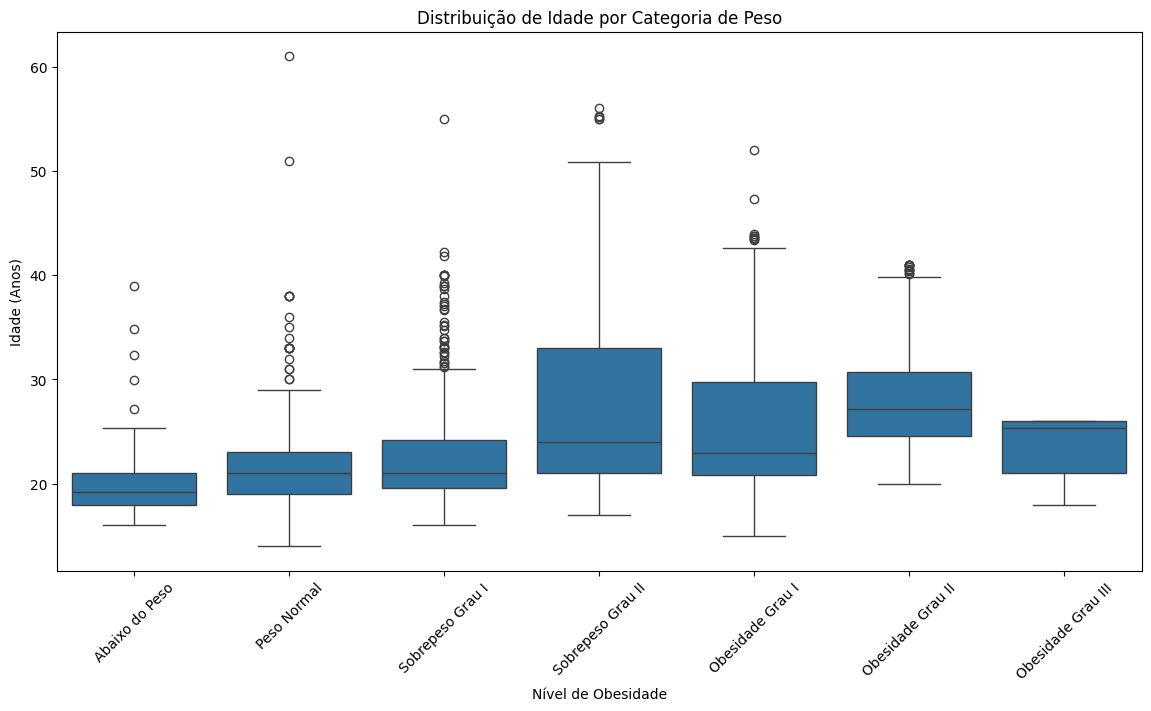

In [45]:
plt.figure(figsize=(14, 7))

# Boxplot para ver a distribuição e os outliers
sns.boxplot(
    data=df, 
    y='Idade', 
    x='Nivel_Obesidade', 
    order=ordem_obesidade, 
)

plt.title('Distribuição de Idade por Categoria de Peso')
plt.xlabel('Nível de Obesidade')
plt.ylabel('Idade (Anos)')
plt.xticks(rotation=45) # Rotação para ler melhor os rótulos
plt.show()

### 📌 Análise: Consumo de Vegetais

Os dados apresentam um comportamento inesperado: 100% dos pacientes com Obesidade Grau III relataram consumir vegetais "Sempre". Isso pode indicar dois cenários: viés de autoavaliação (o paciente relata o que "deveria" fazer, não o que faz) ou que o consumo de vegetais ocorre em conjunto com uma ingestão calórica total excessiva. Já nos graus I e II, o consumo moderado ("Às Vezes") é predominante. Este padrão alerta que apenas recomendar "coma mais vegetais" pode não ser suficiente para os casos mais graves sem controle calórico global.

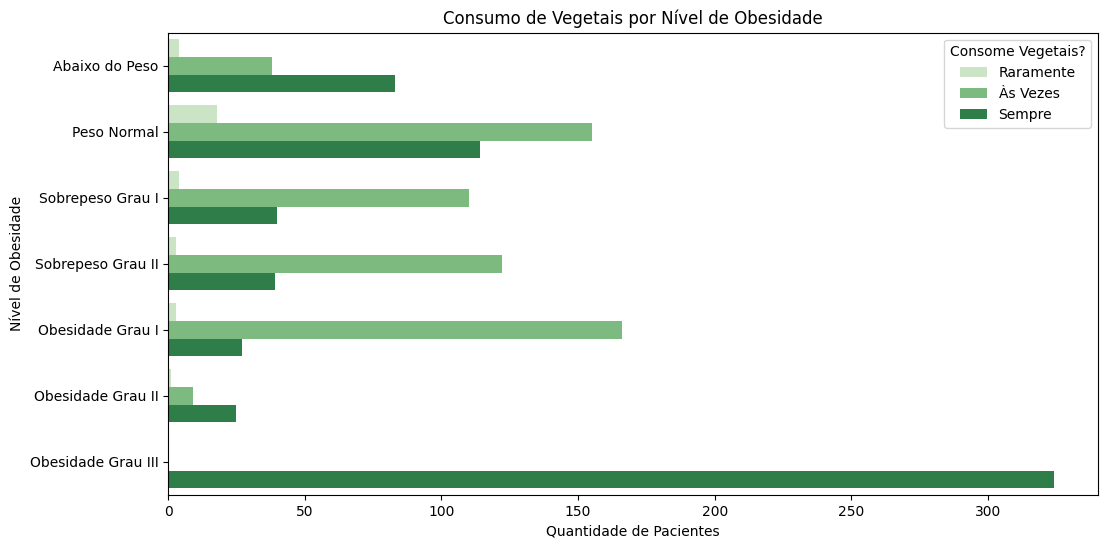

In [46]:
# 1. Traduzindo os valores numéricos para Categorias (conforme dicionário)
# 1 = Raramente, 2 = Às Vezes, 3 = Sempre
map_vegetais = {1: 'Raramente', 2: 'Às Vezes', 3: 'Sempre'}
df['Freq_Vegetais_Label'] = df['Freq_Vegetais'].map(map_vegetais)

# 2. Definindo ordem lógica para a legenda
ordem_vegetais = ['Raramente', 'Às Vezes', 'Sempre']

# 3. Gerando o Gráfico
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df, 
    y='Nivel_Obesidade', 
    hue='Freq_Vegetais_Label', 
    order=ordem_obesidade, 
    hue_order=ordem_vegetais,
    palette='Greens' # Paleta verde faz sentido para vegetais
)

plt.title('Consumo de Vegetais por Nível de Obesidade')
plt.xlabel('Quantidade de Pacientes')
plt.ylabel('Nível de Obesidade')
plt.legend(title='Consome Vegetais?')
plt.show()

### 📌 Análise: Consumo de Água

Ao contrário do esperado, não há uma relação linear onde "beber pouca água causa obesidade". Os dados mostram que o grupo Obesidade Grau III possui uma alta proporção de indivíduos que consomem mais de 2L por dia (aprox. 46%), superior até mesmo a pessoas com Peso Normal. Isso sugere que a alta ingestão de líquidos neste grupo pode estar associada a bebidas calóricas (não diferenciadas nesta variável específica) ou a uma maior necessidade fisiológica de hidratação devido à massa corporal.

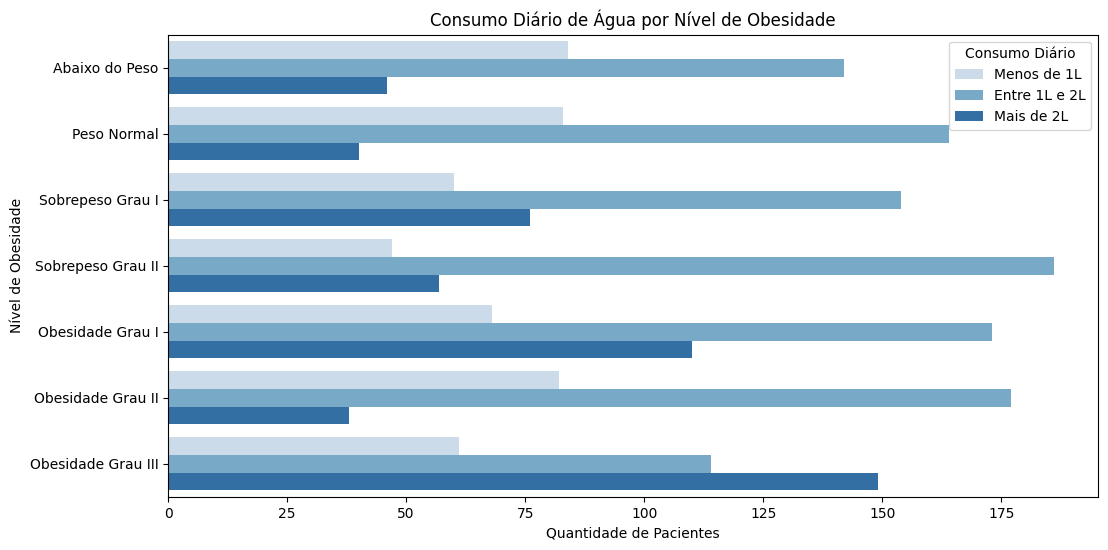

In [47]:
# 1. Traduzindo os valores (1=<1L, 2=1-2L, 3=>2L)
map_agua = {1: 'Menos de 1L', 2: 'Entre 1L e 2L', 3: 'Mais de 2L'}
df['Consumo_Agua_Label'] = df['Consumo_Agua'].round().astype(int).map(map_agua)

# 2. Ordem lógica para o gráfico
ordem_agua = ['Menos de 1L', 'Entre 1L e 2L', 'Mais de 2L']

# 3. Plotando
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df, 
    y='Nivel_Obesidade', 
    hue='Consumo_Agua_Label', 
    order=ordem_obesidade, 
    hue_order=ordem_agua,
    palette='Blues' # Paleta azul para água
)

plt.title('Consumo Diário de Água por Nível de Obesidade')
plt.xlabel('Quantidade de Pacientes')
plt.ylabel('Nível de Obesidade')
plt.legend(title='Consumo Diário')
plt.show()

### 📌 Análise: Consumo de Álcool

A variável apresenta baixa variabilidade nos extremos: os casos de consumo "Frequente" ou "Sempre" são estatisticamente irrelevantes em todas as categorias. O dado mais impactante é que 99.7% dos pacientes com Obesidade Grau III se classificam como consumidores ocasionais ("Às Vezes"), praticamente eliminando o perfil de "Não bebe" neste grupo. Isso sugere que o consumo social de álcool é onipresente nos graus mais altos de obesidade, diferentemente dos grupos de peso normal, onde há uma parcela significativa de abstêmios.

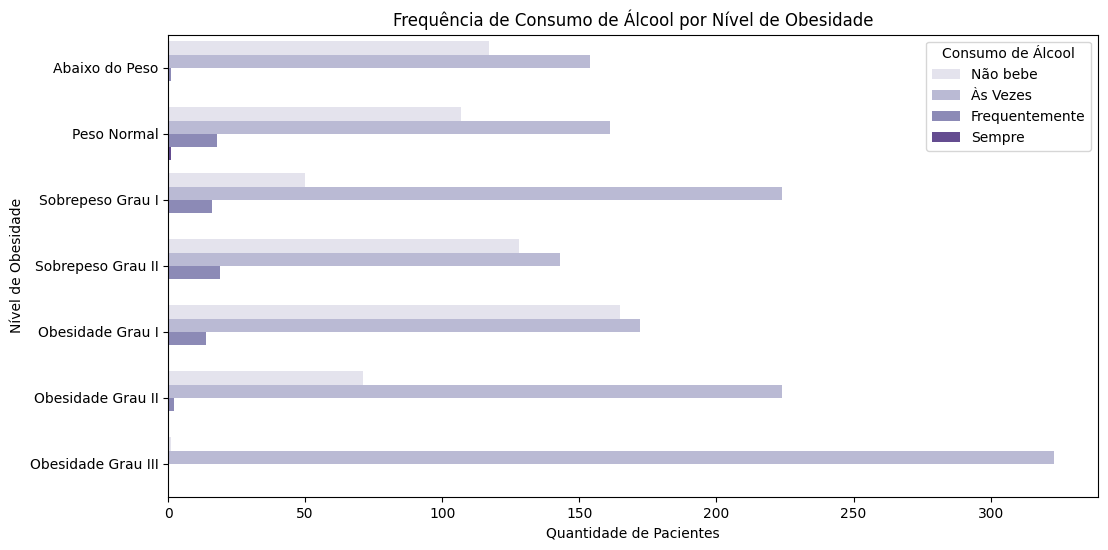

In [48]:
# 1. Tradução dos valores
map_alcool = {
    'no': 'Não bebe',
    'Sometimes': 'Às Vezes',
    'Frequently': 'Frequentemente',
    'Always': 'Sempre'
}
df['Consumo_Alcool'] = df['Consumo_Alcool'].map(map_alcool)

# 2. Ordem lógica para plotagem
ordem_alcool = ['Não bebe', 'Às Vezes', 'Frequentemente', 'Sempre']

# 3. Plotagem
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df, 
    y='Nivel_Obesidade', 
    hue='Consumo_Alcool', 
    order=ordem_obesidade, 
    hue_order=ordem_alcool,
    palette='Purples' # Paleta roxa para variar
)

plt.title('Frequência de Consumo de Álcool por Nível de Obesidade')
plt.xlabel('Quantidade de Pacientes')
plt.ylabel('Nível de Obesidade')
plt.legend(title='Consumo de Álcool')
plt.show()

### 📌 Análise: Atividade Física

A relação entre sedentarismo e obesidade severa fica evidente na categoria Obesidade Grau III, onde aprox. 58% dos pacientes não praticam nenhuma atividade física. No entanto, é interessante notar que no grupo Obesidade Grau II, a maioria (55%) pratica exercícios levemente (1-2 vezes), superando o sedentarismo total. Isso reforça que a falta de exercício é um fator crítico, mas não o único, visto que há pessoas com Peso Normal que também declaram atividade "Nenhuma" (aprox. 27%).

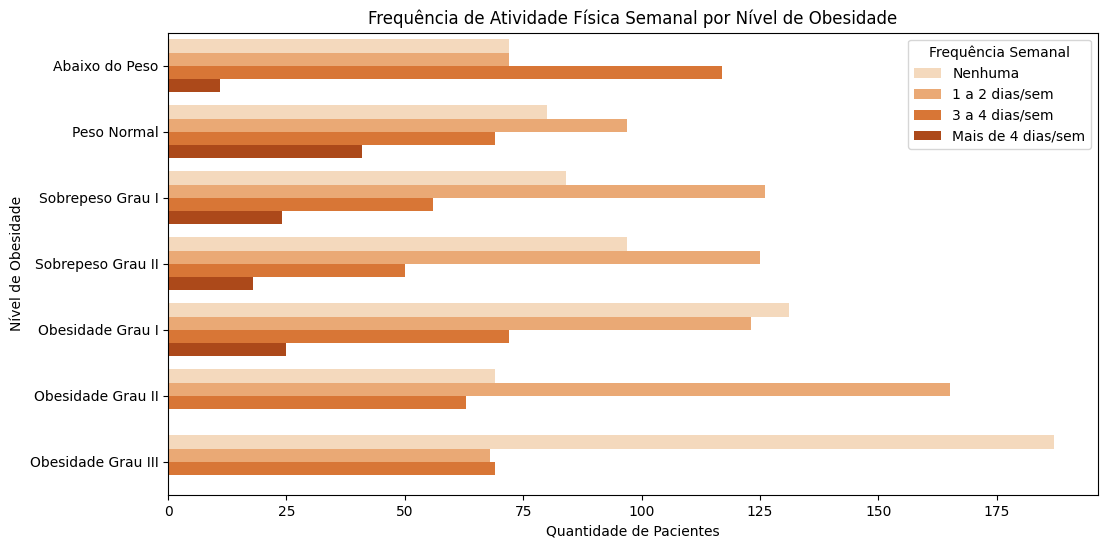

In [49]:
# 1. Traduzindo os valores (0 a 3) conforme dicionário
# 0=Nenhuma, 1=1-2 dias, 2=3-4 dias, 3=5+ dias
map_atividade = {
    0: 'Nenhuma',
    1: '1 a 2 dias/sem',
    2: '3 a 4 dias/sem',
    3: 'Mais de 4 dias/sem'
}
# Arredonda pois original tem decimais
df['Freq_Ativ_Fisica_Label'] = df['Freq_Ativ_Fisica'].round().astype(int).map(map_atividade)

# 2. Ordem lógica
ordem_atividade = ['Nenhuma', '1 a 2 dias/sem', '3 a 4 dias/sem', 'Mais de 4 dias/sem']

# 3. Plotagem
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df, 
    y='Nivel_Obesidade', 
    hue='Freq_Ativ_Fisica_Label', 
    order=ordem_obesidade, 
    hue_order=ordem_atividade,
    palette='Oranges' # Paleta laranja/quente para atividade física
)

plt.title('Frequência de Atividade Física Semanal por Nível de Obesidade')
plt.xlabel('Quantidade de Pacientes')
plt.ylabel('Nível de Obesidade')
plt.legend(title='Frequência Semanal')
plt.show()

### 📌 Análise: Tabagismo

A base de dados revela que o tabagismo é extremamente raro neste grupo de estudo, com uma quantidade ínfima de fumantes em todas as categorias. O destaque, porém, é a quase inexistência de fumantes nos extremos (Abaixo do Peso e Obesidade Grau III, com apenas 1 caso cada).

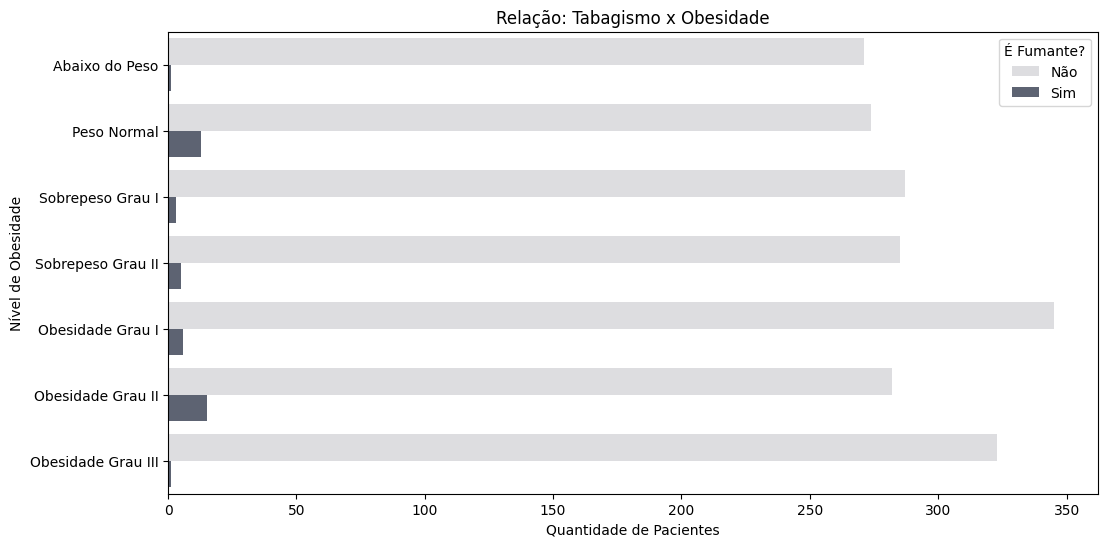

In [51]:
# 1. Tradução da coluna Fumante
traducao_fumo = {'yes': 'Sim', 'no': 'Não'}
df['Fumante'] = df['Fumante'].replace(traducao_fumo)

# 2. Plotagem
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df, 
    y='Nivel_Obesidade', 
    hue='Fumante', 
    order=ordem_obesidade, 
    palette={'Sim': '#596275', 'Não': '#dcdde1'} # Cinza Escuro e Cinza Claro
)

plt.title('Relação: Tabagismo x Obesidade')
plt.xlabel('Quantidade de Pacientes')
plt.ylabel('Nível de Obesidade')
plt.legend(title='É Fumante?')
plt.show()

### 📌 Análise: Monitoramento de Calorias

Este gráfico revela uma correlação negativa quase perfeita. Enquanto cerca de 10% a 12% das pessoas com Peso Normal ou Sobrepeso Leve monitoram ativamente suas calorias, esse hábito desaparece completamente nos graus mais severos de obesidade (caindo para 0% no Grau III e <1% nos Graus I e II).

Insight de Negócio: Isso sugere que a perda da consciência (ou controle) sobre a ingestão calórica é um marcador crítico da transição para a obesidade. Ferramentas que reintroduzam esse monitoramento de forma simples podem ser intervenções eficazes, já que o público-alvo atual (Graus II e III) simplesmente não o faz.

C:\Users\renat\AppData\Local\Temp\ipykernel_20916\1780709529.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


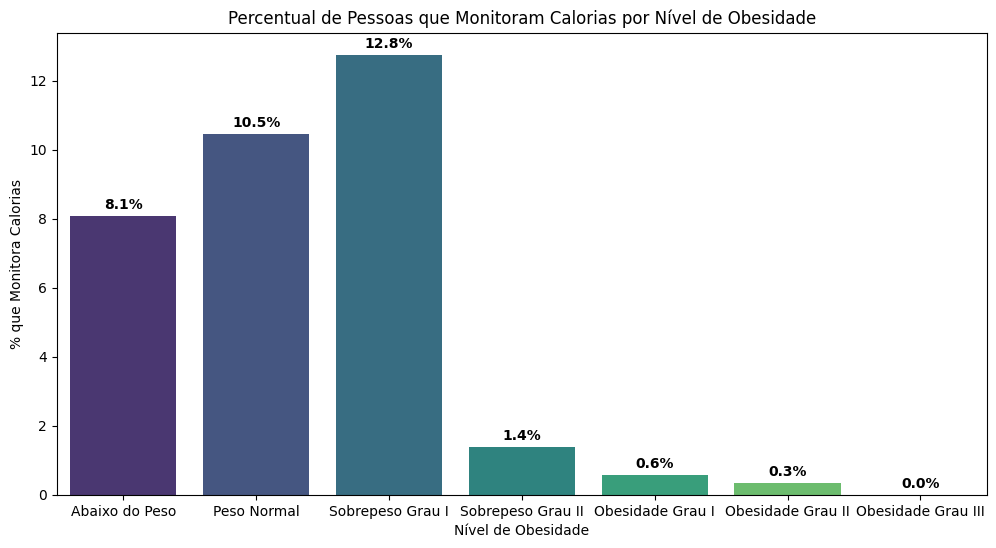

In [52]:
# 1. Tradução da coluna Monitora_Calorias (SCC)
# yes = Sim, no = Não
df['Monitora_Calorias'] = df['Monitora_Calorias'].replace({'yes': 'Sim', 'no': 'Não'})

# 2. Calculando as porcentagens
# normalize='index' calcula a proporção dentro de cada grupo
ct_calorias = pd.crosstab(df['Nivel_Obesidade'], df['Monitora_Calorias'], normalize='index') * 100
ct_calorias = ct_calorias.reindex(ordem_obesidade) # Garantir a ordem correta

# 3. Plotagem
plt.figure(figsize=(12, 6))
# Plotando apenas a coluna 'Sim'
sns.barplot(
    x=ct_calorias.index, 
    y=ct_calorias['Sim'], 
    palette='viridis', 
    order=ordem_obesidade
)

plt.title('Percentual de Pessoas que Monitoram Calorias por Nível de Obesidade')
plt.xlabel('Nível de Obesidade')
plt.ylabel('% que Monitora Calorias')

# Adicionando os rótulos de dados nas barras
for index, value in enumerate(ct_calorias['Sim']):
    plt.text(index, value + 0.2, f'{value:.1f}%', ha='center', fontweight='bold')

plt.show()

### 📌 Análise: Tempo de Tela

Ao contrário do senso comum, não existe uma correlação direta e linear onde "mais tempo de tela = mais obesidade" neste dataset.

Obesidade Grau III: Este grupo apresenta um comportamento peculiar: 0% dos indivíduos relatam ficar mais de 5 horas em telas (focando-se massivamente na faixa intermediária de 3-5 horas).

Uso Moderado x Baixo: O uso baixo (0-2 horas) é bastante comum em graus elevados de obesidade (ex: Grau II com aprox. 58%), até mais do que em grupos de Peso Normal.

Conclusão: O tempo de tela parece ser uma característica geracional ou ocupacional (trabalho/estudo) transversal a todos os grupos de peso, e não um fator discriminante forte para a obesidade severa isoladamente.

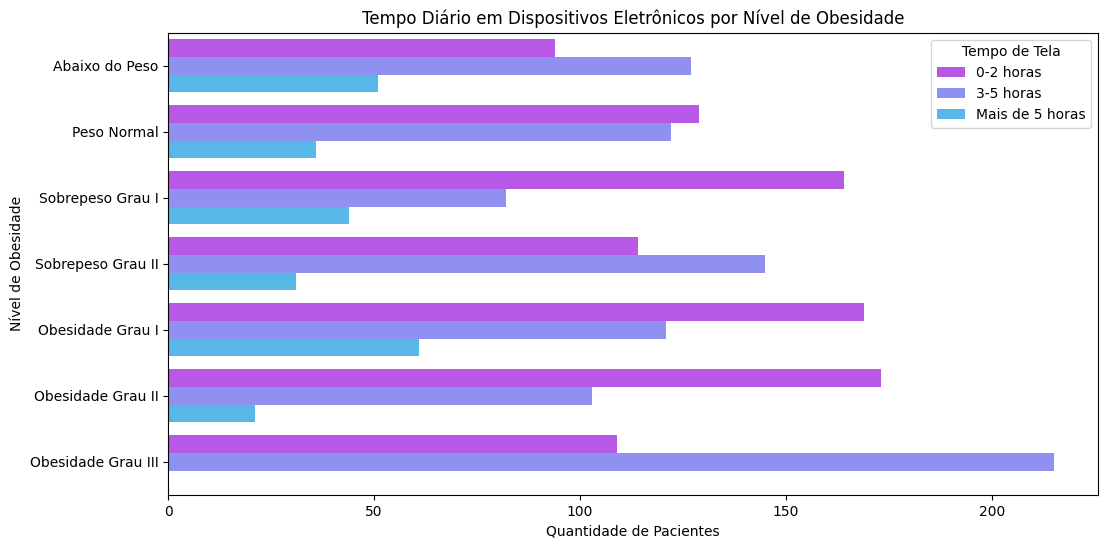

In [53]:
# 1. Tradução e Preparação
# 0 = 0-2h, 1 = 3-5h, 2 = >5h
map_telas = {0: '0-2 horas', 1: '3-5 horas', 2: 'Mais de 5 horas'}

# Arredonda e mapeia
df['Tempo_Dispositivos_Label'] = df['Tempo_Dispositivos'].round().astype(int).map(map_telas)

# 2. Ordem lógica
ordem_telas = ['0-2 horas', '3-5 horas', 'Mais de 5 horas']

# 3. Plotagem
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df, 
    y='Nivel_Obesidade', 
    hue='Tempo_Dispositivos_Label', 
    order=ordem_obesidade, 
    hue_order=ordem_telas,
    palette='cool_r' # Paleta fria/tecnológica
)

plt.title('Tempo Diário em Dispositivos Eletrônicos por Nível de Obesidade')
plt.xlabel('Quantidade de Pacientes')
plt.ylabel('Nível de Obesidade')
plt.legend(title='Tempo de Tela')
plt.show()

## Relatório Executivo: Fatores Determinantes da Obesidade
**Objetivo:** Apresentar os principais insights extraídos da base de dados histórica para orientar estratégias de prevenção e apoio ao diagnóstico médico.

### 1. O "DNA" da Obesidade (Fatores Críticos)
- A análise revelou que dois fatores são divisores de águas entre pacientes com peso normal e pacientes com obesidade severa:

- Hereditariedade é Mandatória: A influência genética é o preditor mais forte. Quase a totalidade (aprox. 100%) dos pacientes com Obesidade Grau II e III possui histórico familiar de excesso de peso.

- Ação Sugerida: O diagnóstico não deve olhar apenas para o indivíduo, mas realizar a triagem familiar imediata.

- A Falta de Consciência Calórica: Existe uma correlação negativa perfeita no monitoramento de calorias. Enquanto 10-12% das pessoas saudáveis monitoram o que comem, esse hábito é inexistente (0%) nos grupos de obesidade mórbida.

***Insight:*** A perda do controle sobre a ingestão (e não apenas a qualidade do alimento) é um marco comportamental da doença.

### 2. Perfil Demográfico de Risco
Identificamos padrões distintos que exigem abordagens personalizadas:

- **Gênero**: A doença se manifesta de forma diferente entre os sexos nos níveis avançados.

- **Homens**: Predominância massiva na Obesidade Grau II.

- **Mulheres**: Predominância massiva na Obesidade Grau III (Mórbida).

- **Idade (O Mito do Metabolismo)**: A obesidade severa nesta base não é uma doença de idosos. A maior concentração de casos graves está em jovens adultos (20 a 30 anos). Campanhas focadas na terceira idade seriam ineficazes para este perfil.

### 3. Comportamento: Mitos vs. Realidade
Dados que contradizem o senso comum e alertam para vieses de autoavaliação dos pacientes:

- O Paradoxo da "Alimentação Saudável": Curiosamente, pacientes com Obesidade Grau III relatam comer vegetais "Sempre" e beber muita água (>2L).

- Interpretação: Isso sugere que o consumo de alimentos saudáveis não está gerando déficit calórico, possivelmente devido ao volume excessivo ou acompanhamento de molhos/preparos calóricos.

- **Sedentarismo Relativo**: A falta de exercício é crítica no Grau III (58% sedentários), mas o grupo Grau II apresenta tentativas de atividade (1-2x na semana), indicando que o exercício isolado, sem dieta, não está contendo a progressão da doença.

- **Fatores Irrelevantes**: O Tabagismo e o Tempo de Tela (>5h) não mostraram correlação direta com o aumento de peso nesta amostra específica.

## 4. Conclusão para a Estratégia
O modelo preditivo terá alta assertividade pois os padrões são claros. Para a equipe médica, a recomendação baseada em dados é:

Priorizar a anamnese familiar.

Focar a reeducação na consciência calórica (monitoramento) e não apenas na recomendação genérica de "comer vegetais", que os pacientes acreditam já fazer.

Atenção redobrada a mulheres jovens com histórico familiar, que representam o maior grupo de risco para obesidade mórbida.